In [23]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

In [24]:

tx_data = pd.read_csv('digikala-orders.csv',encoding = "latin1")
tx_data.head(10)

,ï»¿ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,Ù Ø­Ù ÙØ¯ Ø¢Ø¨Ø§Ø¯,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,Ø®Ø±Ù Ø¯Ø±Ù,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,ÙØ±ÚÚ©,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,ÙÙ,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,ØªÙØ±Ø§Ù,1.0
5,11479246,2841640,312932,2018-03-01 12:07:15.000,290000.0,Ù Ø´ÙØ¯,1.0
6,8267421,5235886,42365,2017-08-19 13:30:24.000,55046.0,Ø§ØµÙÙØ§Ù,1.0
7,11588978,5574955,715680,2018-03-04 19:19:02.000,2790000.0,Ø±Ø´Øª,1.0
8,9916301,1145709,102588,2017-12-11 19:33:59.000,34862.0,ØªÙØ±Ø§Ù,1.0
9,10740652,4928230,658519,2018-01-23 06:11:34.000,2600000.0,Ø®Ø±Ù Ø´ÙØ±,1.0


In [25]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['DateTime_CartFinalize'])
tx_data.head()

,ï»¿ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,InvoiceDate
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,Ù Ø­Ù ÙØ¯ Ø¢Ø¨Ø§Ø¯,1.0,2015-10-15 08:50:56
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,Ø®Ø±Ù Ø¯Ø±Ù,1.0,2018-02-11 00:29:26
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,ÙØ±ÚÚ©,1.0,2016-06-14 00:30:08
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,ÙÙ,1.0,2018-09-03 14:37:19
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,ØªÙØ±Ø§Ù,1.0,2016-05-21 11:51:02


In [26]:

tx_data['InvoiceYearMonth'] = tx_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [27]:

tx_data.sort_values(by=['DateTime_CartFinalize'])

,ï»¿ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,InvoiceDate,InvoiceYearMonth
69768,1000740,609924,6906,2013-09-27 12:03:00.000,812453.0,ÙÙ,1.0,2013-09-27 12:03:00,201309
153955,1000411,720568,8777,2013-09-27 19:43:00.000,3254717.0,ØªÙØ±Ø§Ù,1.0,2013-09-27 19:43:00,201309
72224,1000977,695557,3136,2013-09-27 22:26:00.000,8764151.0,Ø´ÙØ±Ú©Ø±Ø¯,1.0,2013-09-27 22:26:00,201309
185193,1000919,470250,1532,2013-09-28 12:04:00.000,926226.0,Ø²ÙØ¬Ø§Ù,2.0,2013-09-28 12:04:00,201309
160662,1002123,531450,8045,2013-09-29 22:08:00.000,9433585.0,Ø±Ø´Øª,1.0,2013-09-29 22:08:00,201309
...,...,...,...,...,...,...,...,...,...
154568,24846101,548325,1402280,2018-12-11 03:19:28.000,204000.0,ØªÙØ±Ø§Ù,1.0,2018-12-11 03:19:28,201812
160070,24846343,5988160,1840495,2018-12-11 03:54:39.000,188500.0,ØªÙØ±Ø§Ù,1.0,2018-12-11 03:54:39,201812
5343,24846353,2614410,1903360,2018-12-11 03:55:47.000,220000.0,Ø´ÛØ±Ø§Ø²,1.0,2018-12-11 03:55:47,201812
38450,24846426,755895,2093722,2018-12-11 04:16:28.000,500000.0,ØªÙØ±Ø§Ù,1.0,2018-12-11 04:16:28,201812


In [28]:
tx_revenue = tx_data.groupby(['InvoiceYearMonth']).sum().reset_index()
tx_revenue

,InvoiceYearMonth,ï»¿ID_Order,ID_Customer,ID_Item,Amount_Gross_Order,Quantity_item
0,201309,6007770,3643236,31532,3.197792e+07,7.0
1,201310,73965523,46269629,465922,4.030806e+08,77.0
2,201311,93563972,57605589,675069,3.536350e+08,104.0
3,201312,123191584,75659250,976901,4.244551e+08,125.0
4,201401,153460155,94271502,1234375,5.369787e+08,156.0
...,...,...,...,...,...,...
59,201808,131074705809,21497705671,4868164947,6.513781e+09,7944.0
60,201809,148103558516,23290473003,5999676999,7.394628e+09,8911.0
61,201810,129486795422,19806903991,5706065154,6.187311e+09,7311.0
62,201811,144825614295,21126814994,6950082847,7.026060e+09,7572.0


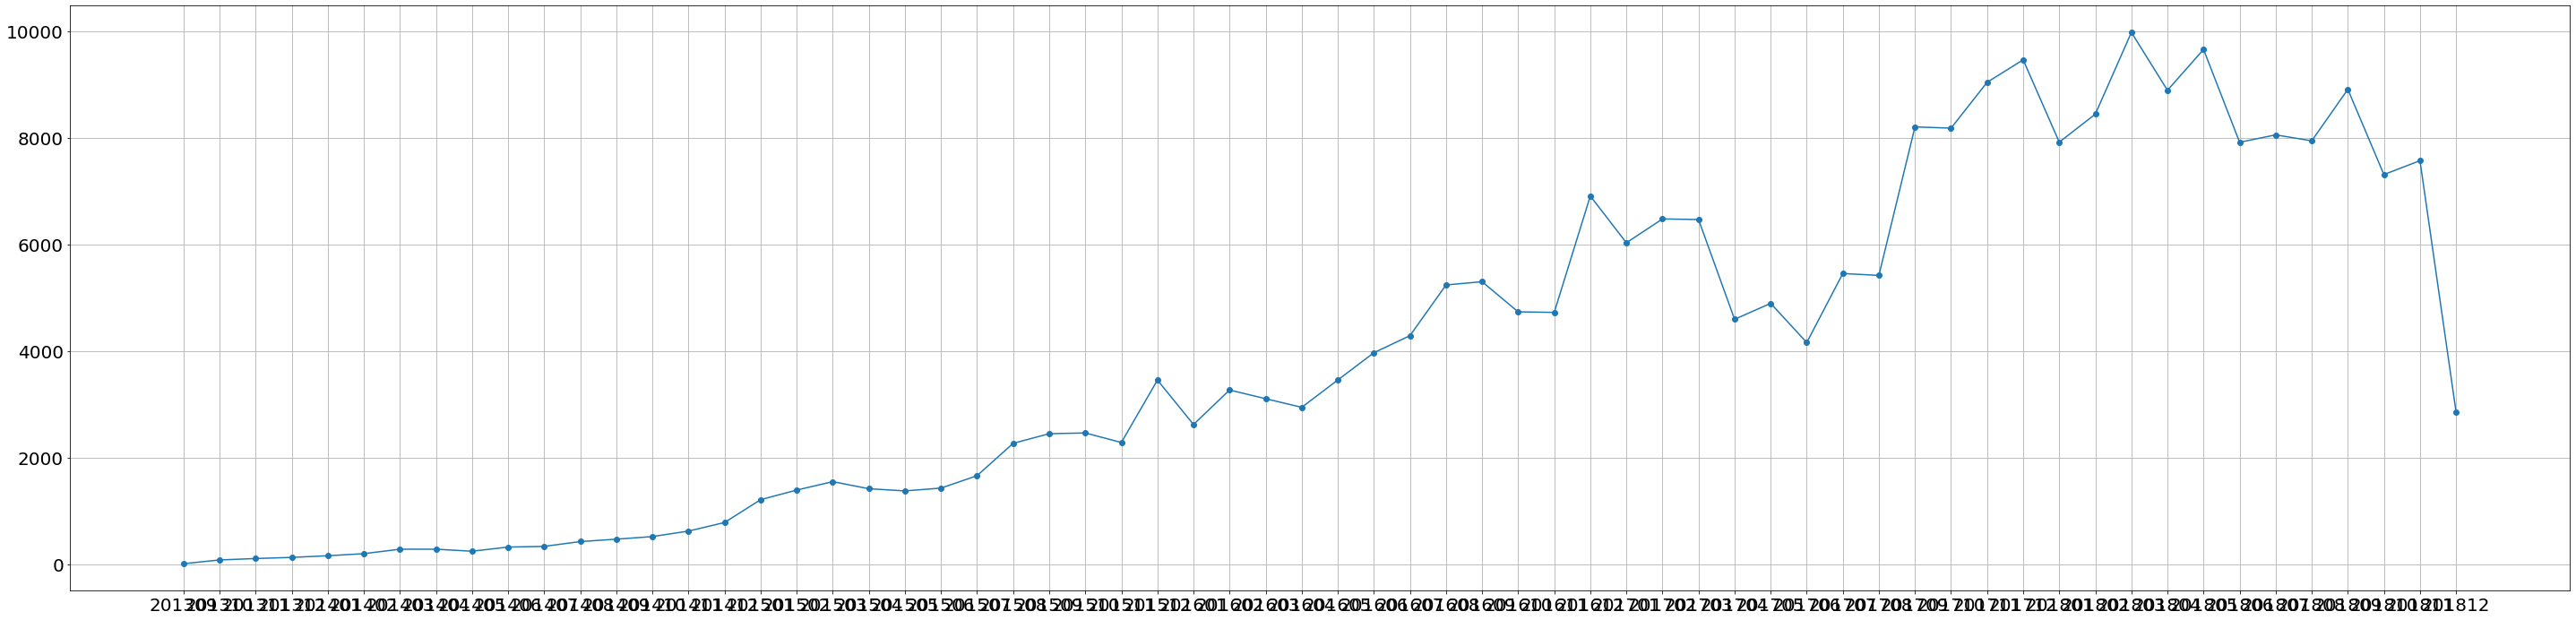

In [29]:
fig = plt.figure(figsize=(50,12))
plt.plot(tx_revenue['InvoiceYearMonth'].to_numpy(dtype='str'), tx_revenue['Quantity_item'], marker='o')
plt.grid()

In [30]:
fig.savefig('plt.png', dpi=200)


In [31]:
import pandas as pd    
df = pd.read_csv('digikala-orders.csv', encoding='utf-8-sig')
df.head()
# tx_city = df.groupby(['ID_Customer'])['city_name_fa'].nunique()
tx_monthly_active = df.groupby('city_name_fa')['ID_Customer'].nunique().reset_index()
tx_monthly_active.head(10)

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
5,آبدانان,37
6,آبسرد,8
7,آبش احمد,3
8,آبعلی,2
9,آبپخش,17


In [32]:
plt.savefig('pie.png', dpi=200)

<Figure size 432x288 with 0 Axes>

,city_name_fa,ID_Order,ID_Customer,ID_Item,Amount_Gross_Order,Quantity_item,sahmeharshahr
0,آب بر,1.132562e+08,4.517340e+07,3468606.0,2.090354e+07,15.0,0.000059
1,آبادان,4.158434e+09,1.286212e+09,167678989.0,5.579178e+08,493.0,0.001954
2,آباده,7.271869e+08,2.133266e+08,22580807.0,2.532355e+08,84.0,0.000333
3,آباده طشک,3.863704e+07,1.510047e+07,1624591.0,3.917936e+07,3.0,0.000012
4,آبدان,2.482254e+07,7.358468e+06,1412822.0,7.838532e+06,2.0,0.000008
...,...,...,...,...,...,...,...
902,یاسوج,2.887365e+09,8.802117e+08,111347370.0,4.501004e+08,335.0,0.001328
903,یاسوکند,3.646149e+07,1.317065e+07,2442319.0,2.200000e+05,2.0,0.000008
904,یامچی,1.156805e+07,6.179800e+06,287183.0,1.082570e+05,1.0,0.000004
905,یزد,2.000273e+10,5.796160e+09,770593129.0,3.400511e+09,3048.0,0.012083


<ipython-input-33-29d50d40691d>:26: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(sizes, labels=persian_labels, autopct=en_to_fa)


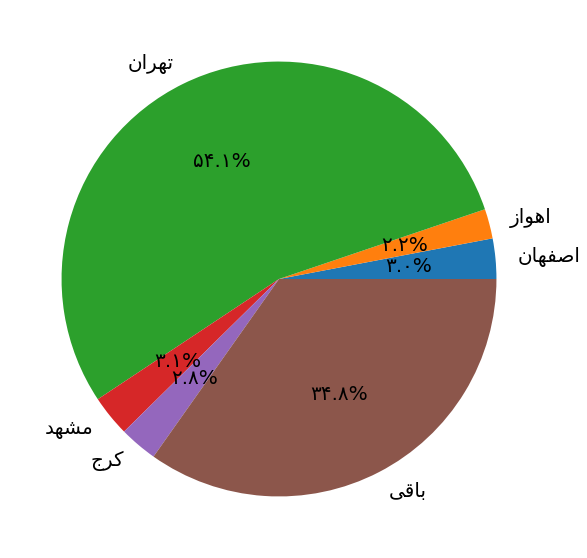

In [33]:
import matplotlib.pyplot as plt 
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import matplotlib
def en_to_fa(num, formatter='%1.1f%%'):
    num_as_string = formatter % num 
    mapping = dict(list(zip('0123456789.%', '۰۱۲۳۴۵۶۷۸۹.%')))
    return ''.join(mapping[digit] for digit in num_as_string)

import pandas as pd

df = pd.read_csv('digikala-orders.csv', encoding='utf-8-sig')
city = df.groupby(['city_name_fa']).sum().reset_index()
city['sahmeharshahr'] = city['Quantity_item']/city['Quantity_item'].sum()
new_row = pd.DataFrame(data = {'city_name_fa' : ['باقی'],'sahmeharshahr' : city.query("sahmeharshahr < 0.02")['sahmeharshahr'].sum()})
city = pd.concat([city, new_row])
display(city)

font = {'family': 'Sahel', 'size': 20} 
matplotlib.rc('font', **font)
labels = city.query("sahmeharshahr > 0.02")['city_name_fa'];
sizes = city.query("sahmeharshahr > 0.02")['sahmeharshahr'];
persian_labels = [get_display(reshape(label)) for label in labels]

fig = plt.figure(figsize=(10,10))
plt.pie(sizes, labels=persian_labels, autopct=en_to_fa)
plt.savefig('pie.png', dpi=200)

,city_name_fa,ID_Customer,sahmeharshahr
0,آب بر,14.0,0.000091
1,آبادان,320.0,0.002082
2,آباده,48.0,0.000312
3,آباده طشک,3.0,0.000020
4,آبدان,2.0,0.000013
...,...,...,...
902,یاسوج,229.0,0.001490
903,یاسوکند,1.0,0.000007
904,یامچی,1.0,0.000007
905,یزد,1626.0,0.010578


<ipython-input-34-9a99d59e1677>:26: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(sizes, labels=persian_labels, autopct=en_to_fa)


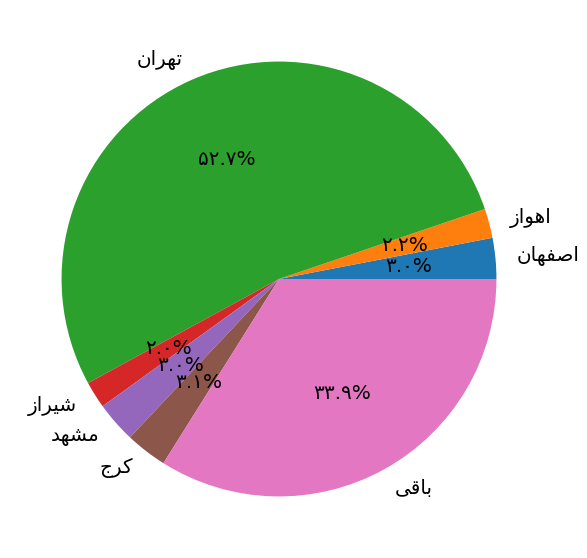

In [34]:
import matplotlib.pyplot as plt 
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import matplotlib
def en_to_fa(num, formatter='%1.1f%%'):
    num_as_string = formatter % num 
    mapping = dict(list(zip('0123456789.%', '۰۱۲۳۴۵۶۷۸۹.%')))
    return ''.join(mapping[digit] for digit in num_as_string)

import pandas as pd

df = pd.read_csv('digikala-orders.csv', encoding='utf-8-sig')
city = df.groupby('city_name_fa')['ID_Customer'].nunique().reset_index()
city['sahmeharshahr'] = city['ID_Customer']/city['ID_Customer'].sum()
new_row = pd.DataFrame(data = {'city_name_fa' : ['باقی'],'sahmeharshahr' : city.query("sahmeharshahr < 0.02")['sahmeharshahr'].sum()})
city = pd.concat([city, new_row])
display(city)

font = {'family': 'Sahel', 'size': 20} 
matplotlib.rc('font', **font)
labels = city.query("sahmeharshahr > 0.02")['city_name_fa'];
sizes = city.query("sahmeharshahr > 0.02")['sahmeharshahr'];
persian_labels = [get_display(reshape(label)) for label in labels]

fig = plt.figure(figsize=(10,10))
plt.pie(sizes, labels=persian_labels, autopct=en_to_fa)
plt.savefig('pie.png', dpi=200)

In [35]:
city = df.groupby('city_name_fa')['ID_Customer'].nunique().reset_index()
